# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/judge-1377884607_tweet_product_company.csv', encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
df1 = df.drop('emotion_in_tweet_is_directed_at', axis=1)

In [4]:
df1.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product':'target'}, 
          inplace=True)
df1.head()

,tweet_text,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


# Clean Data

In [5]:
import numpy as np
np.random.seed(0)
import nltk
from nltk import FreqDist, word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
import string
import re, collections
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams

# nltk.download('punkt')
# nltk.download('stopwords')

In [6]:
df1 = df1.replace({'No emotion toward brand or product':'neutral'})
df1 = df1.replace({"I can't tell":'neutral'})
df1 = df1.replace({'Positive emotion':'positive'})
df1 = df1.replace({'Negative emotion':'negative'})

In [7]:
df1['tweet_text'] = df1.tweet_text.astype(str)

In [8]:
df1['clean_tweet'] = df1['tweet_text'].dropna()

In [9]:
df1

,tweet_text,target,clean_tweet
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,negative,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,positive,@jessedee Know about @fludapp ? Awesome iPad/i...
2,@swonderlin Can not wait for #iPad 2 also. The...,positive,@swonderlin Can not wait for #iPad 2 also. The...
3,@sxsw I hope this year's festival isn't as cra...,negative,@sxsw I hope this year's festival isn't as cra...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,positive,@sxtxstate great stuff on Fri #SXSW: Marissa M...
...,...,...,...
9088,Ipad everywhere. #SXSW {link},positive,Ipad everywhere. #SXSW {link}
9089,"Wave, buzz... RT @mention We interrupt your re...",neutral,"Wave, buzz... RT @mention We interrupt your re..."
9090,"Google's Zeiger, a physician never reported po...",neutral,"Google's Zeiger, a physician never reported po..."
9091,Some Verizon iPhone customers complained their...,neutral,Some Verizon iPhone customers complained their...


## Remove Urls

In [10]:
def remove_urls(corpus):
#     pattern = re.compile(r'https?:\/\/\S*')
    pattern = re.compile(r"(https?:\/\/)?(www\.)[-a-zA-Z0-9@:%._\+~#=]+\.[a-z]{2,4}\b([-a-zA-Z0-9@:%_\+.~#?&\/\/=]*)|(https?:\/\/)?(www\.)?(?!ww)[-a-zA-Z0-9@:%._\+~#=]+\.[a-z]{2,4}\b([-a-zA-Z0-9@:%_\+.~#?&\/\/=]*)") 
    # captures six different groups of websites
    return pattern.sub(r'', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_urls(x))

In [11]:
df1['tweet_text'][5]

'@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd'

In [12]:
df1['clean_tweet'][5]

'@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference  #iear #edchat #asd'

## Remove Unidecode

In [13]:
import unidecode

In [14]:
df1['clean_tweet'] = df1['clean_tweet'].apply(unidecode.unidecode)

In [15]:
df1['tweet_text'][106]

'\x89ÛÏ@mention &quot;Google before you tweet&quot; is the new &quot;think before you speak.&quot; - Mark Belinsky, #911tweets panel at #SXSW.\x89Û\x9d'

In [16]:
df1['clean_tweet'][106]

'UI@mention &quot;Google before you tweet&quot; is the new &quot;think before you speak.&quot; - Mark Belinsky, #911tweets panel at #SXSW.U'

## Remove Links

In [17]:
df1['clean_tweet'] = df1['clean_tweet'].str.replace(r"({link})", '')

In [18]:
df1['tweet_text'][32]

'Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}'

In [19]:
df1['clean_tweet'][32]

'Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. '

## Remove Hashtags

In [20]:
def remove_hashtags(corpus):
    pattern = re.compile(r"\s?([@#][\w_-]+)")
    return pattern.sub(r'', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_hashtags(x))

In [21]:
df1['tweet_text'][1]

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [22]:
df1['clean_tweet'][1]

" Know about ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at"

## Remove Numbers

In [23]:
def remove_numbers(corpus):
    pattern = re.compile(r"\d.?")
    return pattern.sub(r'', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: remove_numbers(x))

In [24]:
df1['tweet_text'][0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [25]:
df1['clean_tweet'][0]

'. I have a  iPhone. After hrs tweeting at, it was dead!  I need to upgrade. Plugin stations at.'

## Lowercase Text

In [26]:
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['clean_tweet'].head()

0    . i have a iphone. after hrs tweeting at, it w...
1    know about ? awesome ipad/iphone app that you'...
2    can not wait for also. they should sale them d...
3    i hope this year's festival isn't as crashy as...
4    great stuff on fri: marissa mayer (google), ti...
Name: clean_tweet, dtype: object

## Stopwords

In [27]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

In [28]:
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
df1['char_count'] = df1['tweet_text'].str.len() #how many characters do we have in description? 
print(df1[['tweet_text','char_count']].head())
print(df1['char_count'].mean())

                                          tweet_text  char_count
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...         127
1  @jessedee Know about @fludapp ? Awesome iPad/i...         139
2  @swonderlin Can not wait for #iPad 2 also. The...          79
3  @sxsw I hope this year's festival isn't as cra...          82
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...         131
104.95106125591114


In [30]:
# count stopwords in row
df1['stopwords'] = df1['tweet_text'].apply(lambda x: len([x for x in x.split() if x in stopwords_list]))
df1[['tweet_text','stopwords']].head(10)

,tweet_text,stopwords
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,7
1,@jessedee Know about @fludapp ? Awesome iPad/i...,6
2,@swonderlin Can not wait for #iPad 2 also. The...,6
3,@sxsw I hope this year's festival isn't as cra...,5
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,1
5,@teachntech00 New iPad Apps For #SpeechTherapy...,0
6,nan,0
7,"#SXSW is just starting, #CTIA is around the co...",14
8,Beautifully smart and simple idea RT @madebyma...,4
9,Counting down the days to #sxsw plus strong Ca...,5


In [31]:
# remove stopwords
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_list))
df1['clean_tweet'].head()

0    . iphone. hrs tweeting at, dead! need upgrade....
1    know ? awesome ipad/iphone app likely apprecia...
2                                  wait also. sale at.
3       hope year's festival crashy year's iphone app.
4    great stuff fri: marissa mayer (google), tim o...
Name: clean_tweet, dtype: object

## Remove Punctuation

In [32]:
def remove_punct(corpus):
    pattern = re.compile(r"[\|\^\+\[\]\(\),~\'?\.\/{}=!$%&:;_-]") # Match any character in set
    return pattern.sub(r' ', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_punct(x))

In [33]:
df1['tweet_text'][1]

"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW"

In [34]:
df1['clean_tweet'][1]

'know   awesome ipad iphone app likely appreciate design  also  they re giving free ts'

In [35]:
# remove again in case some words weren't removed
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords_list))
df1['clean_tweet'].head()

0    iphone hrs tweeting dead need upgrade plugin s...
1    know awesome ipad iphone app likely appreciate...
2                                       wait also sale
3            hope year festival crashy year iphone app
4    great stuff fri marissa mayer google tim reill...
Name: clean_tweet, dtype: object

## Extra cleaning

In [36]:
# remove one or two letter words
def remove_singles(corpus):
    pattern = re.compile(r"(\b\w?\w\b)") # Match any single letter or 2 letter words in set
    return pattern.sub(r' ', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_singles(x))

In [37]:
def remove_quot(corpus):
    pattern = re.compile(r"\s(quot)\s") #remove the word quot from tweets
    return pattern.sub(r' ', corpus)

df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_quot(x))

## Create one string from column

In [38]:
tweet_str = ' '.join(df1['clean_tweet'].tolist())
tweet_str

'iphone hrs tweeting dead need upgrade plugin stations know awesome ipad iphone app likely appreciate design also giving free   wait also sale hope year festival crashy year iphone app great stuff fri marissa mayer google tim reilly tech books conferences amp matt mullenweg wordpress new ipad apps communication showcased conference nan starting around corner hop skip jump good time fan beautifully smart simple idea   wrote ipad app counting days plus strong canadian dollar means stock apple gear excited meet show sprint galaxy still running android find amp start impromptu parties wait til android app comes foursquare ups game time still prefer far best looking android app date gotta love google calendar featuring top parties show cases check   via   great ipad app haha awesomely rad ipad app holler gram ipad itunes app store via noticed dst coming weekend many iphone users hour late sxsw come sunday morning added flights matching people planes airports also downloaded iphone app nicel

In [39]:
# get rid of extra whitespaces
tweet_str = " ".join(tweet_str.split())
tweet_str

'iphone hrs tweeting dead need upgrade plugin stations know awesome ipad iphone app likely appreciate design also giving free wait also sale hope year festival crashy year iphone app great stuff fri marissa mayer google tim reilly tech books conferences amp matt mullenweg wordpress new ipad apps communication showcased conference nan starting around corner hop skip jump good time fan beautifully smart simple idea wrote ipad app counting days plus strong canadian dollar means stock apple gear excited meet show sprint galaxy still running android find amp start impromptu parties wait til android app comes foursquare ups game time still prefer far best looking android app date gotta love google calendar featuring top parties show cases check via great ipad app haha awesomely rad ipad app holler gram ipad itunes app store via noticed dst coming weekend many iphone users hour late sxsw come sunday morning added flights matching people planes airports also downloaded iphone app nicely done m

# Feature Engineering

## Tokenize

In [40]:
tokens = nltk.word_tokenize(tweet_str)
print(len(tokens))

76327


## Lemmatize text

In [41]:
lemma_tweet = lambda x: lemmatize_text(x)
lemma = WordNetLemmatizer()
tokens = [lemma.lemmatize(token) for token in tokens]

## Word Cloud

In [42]:
tweet_str = ' '.join(df1['clean_tweet'].tolist())
tokens = nltk.word_tokenize(tweet_str)

In [43]:
from collections import Counter
count = Counter(tokens)
common_tag_200 = count.most_common(16208)
common_tag_200[:10]

[('google', 2332),
 ('ipad', 2327),
 ('apple', 1904),
 ('store', 1479),
 ('iphone', 1321),
 ('new', 1090),
 ('austin', 861),
 ('amp', 836),
 ('app', 805),
 ('social', 650)]

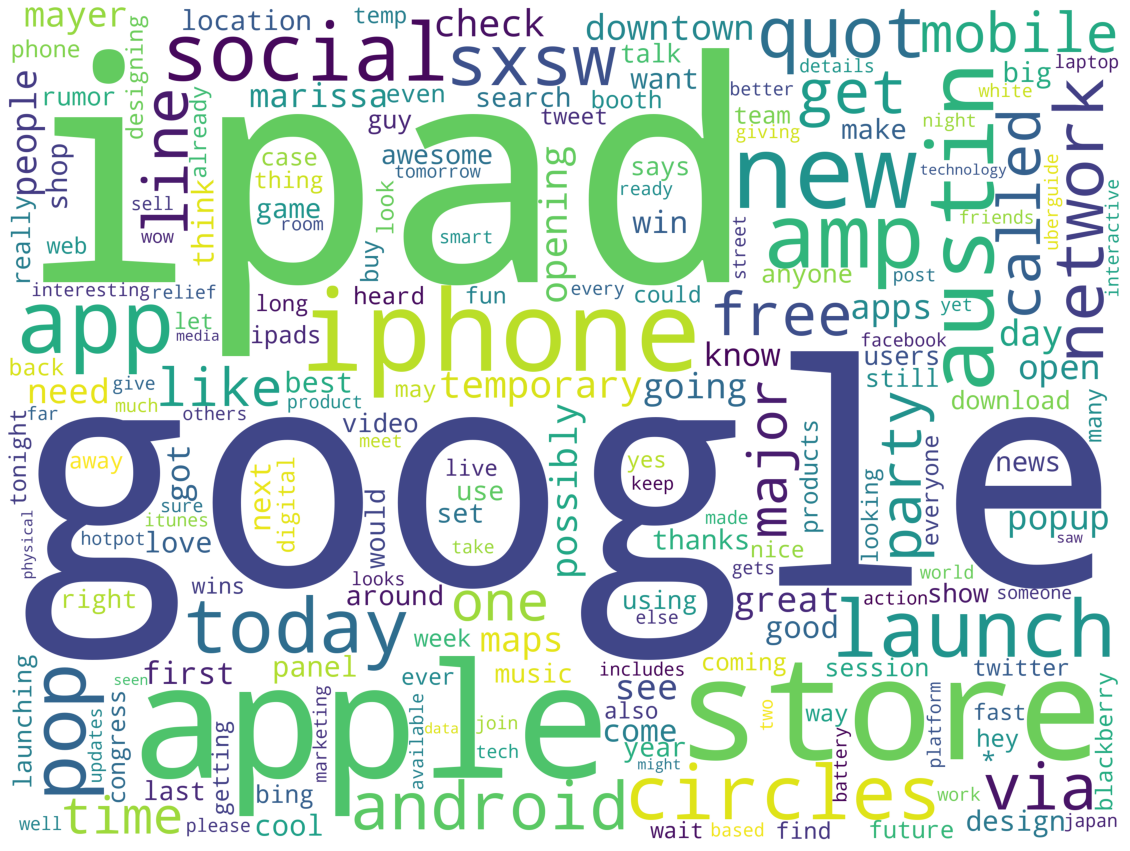

In [44]:
from wordcloud import WordCloud

wc = WordCloud(background_color="white", width=3200, height=2400)
cloud = wc.generate_from_frequencies(dict(common_tag_200))
plt.figure(figsize=(20, 16))
plt.axis('off')
plt.imshow(cloud)
plt.show()

**So of course the most frequent words are the brands we're focused on: google and apple. Then we get some products and descriptions such as iPad, iPhone, new, and free.**

## Word Clouds By Emotion

In [45]:
# create seperate dataframes for each emotion and their common words
pos_comments = df1[df1['target'] == 'positive']['clean_tweet']
pos_words = ' '.join(pos_comments).split()
pos_words = pd.DataFrame(pos_words, columns=['words'])['words'].value_counts()[1:]

neut_comments = df1[df1['target'] == 'neutral']['clean_tweet']
neut_words = ' '.join(neut_comments).split()
neut_words = pd.DataFrame(neut_words, columns=['words'])['words'].value_counts()[1:]

neg_comments = df1[df1['target'] == 'negative']['clean_tweet']
neg_words = ' '.join(neg_comments).split()
neg_words = pd.DataFrame(neg_words, columns=['words'])['words'].value_counts()[1:]

In [46]:
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x:remove_quot(x))

In [47]:
pos_words[:25]

apple      754
google     665
store      545
iphone     467
app        389
new        358
austin     257
pop        213
amp        211
android    164
get        158
launch     156
one        148
quot       144
sxsw       144
great      137
via        132
line       130
party      130
time       128
social     122
free       119
cool       118
like       115
today      111
Name: words, dtype: int64

In [48]:
# create wordclouds for each emotion
pos_wc = WordCloud(width=1280, height=880, collocations=False, random_state=42,
                      colormap='Purples', background_color='white', max_words=50)
pos_wc = pos_wc.generate_from_frequencies(pos_words)

neut_wc = WordCloud(width=1280, height=880, collocations=False, random_state=42,
                      colormap='Blues', background_color='white', max_words=50)
neut_wc = neut_wc.generate_from_frequencies(neut_words)

neg_wc = WordCloud(width=1280, height=880, collocations=False, random_state=42,
                      colormap='Reds', background_color='white', max_words=50)
neg_wc = neg_wc.generate_from_frequencies(neg_words)

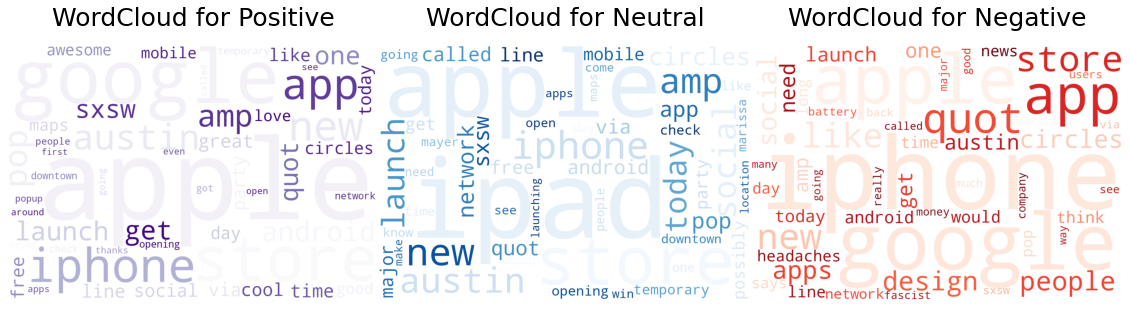

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(20, 20))

axes[0].set_title('WordCloud for Positive', size=25, pad=20)
axes[0].imshow(pos_wc)
axes[0].axis('off')

axes[1].set_title('WordCloud for Neutral', size=25, pad=20)
axes[1].imshow(neut_wc)
axes[1].axis('off')

axes[2].set_title('WordCloud for Negative', size=25, pad=20)
axes[2].imshow(neg_wc)
axes[2].axis('off')

fig.subplots_adjust(hspace=1,wspace=0.0)

**We can see words like amp, awesome, and great in the positive word clouds. Temporary, network, need in neutral word clouds. Long, line, headaches in negative word clouds. You can also see there are common words among all the word clouds, meaning that words alone can have a lot of different meaning. We need to get more context from each tweet to understand the reasoning of the sentiment.**

## Pos Tag

In [50]:
# find and count all the tags in dataframe
token_pos = nltk.pos_tag(tokens)
postags_df = pd.DataFrame(token_pos, columns=('word', 'POS'))
pos_sum = postags_df.groupby('POS', as_index=False).count()
pos_sum.sort_values(['word'], ascending=False)

,POS,word
10,NN,32690
6,JJ,14787
12,NNS,6861
25,VBP,4524
23,VBG,3939
15,RB,3168
22,VBD,2158
5,IN,1646
21,VB,1510
24,VBN,1505


In [51]:
#getting just the nouns, verbs, and adjectives
filtered_pos = [ ]
for one in token_pos:
    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS' or one[1] == 'VBP' or one[1] == 'VBN' or one[1] == 'VBD' or one[1] == 'VB' or one[1] == 'VBZ' or one[1] == 'JJ' or one[1] == 'JJR' or one[1] == 'JJS':
        filtered_pos.append(one)
print (len(filtered_pos))

65961


In [52]:
fdist_pos = nltk.FreqDist(filtered_pos)
top_100_words = fdist_pos.most_common(100)
print(top_100_words)

[(('apple', 'NN'), 1904), (('google', 'NN'), 1503), (('store', 'NN'), 1442), (('ipad', 'NN'), 1101), (('new', 'JJ'), 1090), (('iphone', 'NN'), 1008), (('ipad', 'JJ'), 920), (('social', 'JJ'), 650), (('today', 'NN'), 579), (('austin', 'NN'), 568), (('circles', 'NNS'), 561), (('app', 'NN'), 521), (('pop', 'NN'), 505), (('network', 'NN'), 465), (('launch', 'NN'), 433), (('amp', 'NN'), 412), (('line', 'NN'), 406), (('google', 'VBP'), 404), (('free', 'JJ'), 367), (('google', 'JJ'), 366), (('party', 'NN'), 345), (('called', 'VBN'), 337), (('major', 'JJ'), 304), (('sxsw', 'NN'), 283), (('time', 'NN'), 277), (('temporary', 'JJ'), 264), (('android', 'JJ'), 240), (('mobile', 'JJ'), 237), (('day', 'NN'), 235), (('people', 'NNS'), 231), (('great', 'JJ'), 222), (('quot', 'NN'), 219), (('open', 'JJ'), 209), (('maps', 'NNS'), 203), (('mayer', 'NN'), 192), (('downtown', 'NN'), 192), (('ipad', 'VBP'), 189), (('iphone', 'JJ'), 188), (('amp', 'JJ'), 185), (('get', 'VB'), 181), (('got', 'VBD'), 178), (('a

In [53]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS
top_words_df = top_words_df.drop('pos', 1) # drop the previous column
top_words_df.head(10)

,count,Word
0,1904,apple
1,1503,google
2,1442,store
3,1101,ipad
4,1090,new
5,1008,iphone
6,920,ipad
7,650,social
8,579,today
9,568,austin


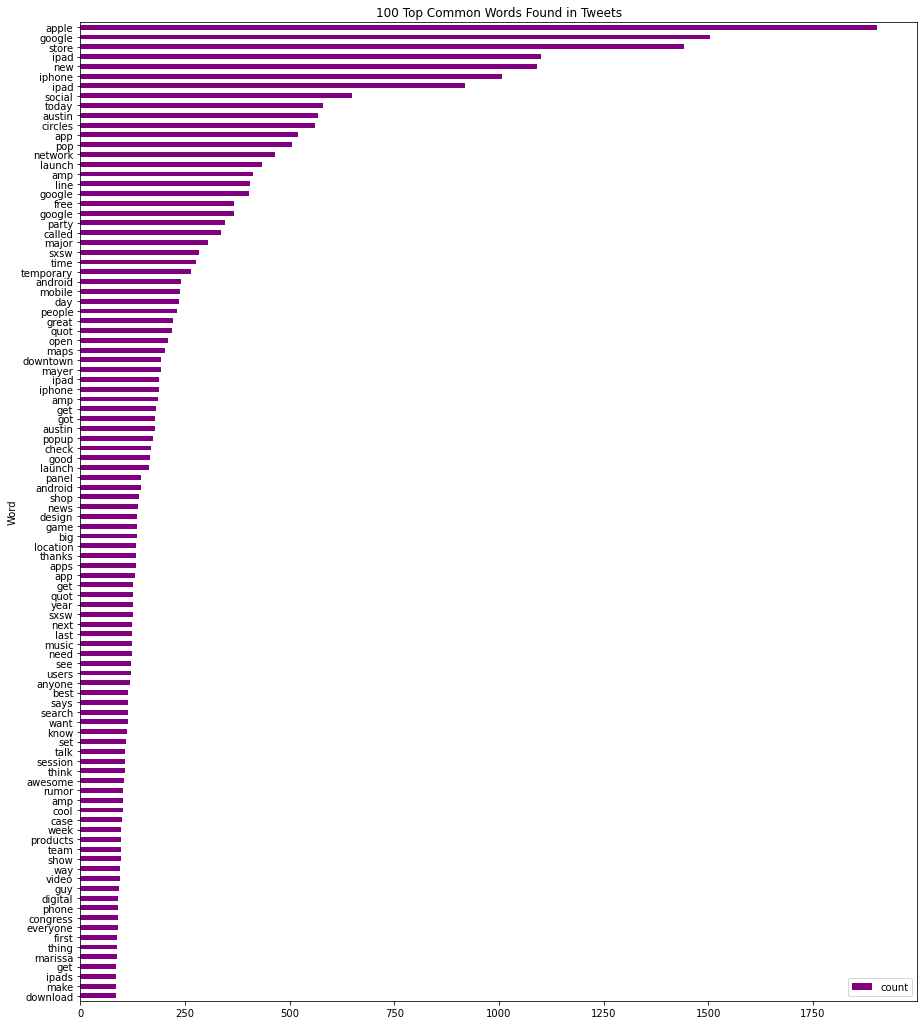

In [54]:
fig, ax = plt.subplots(figsize=(15,18))
top_words_df.sort_values(by='count').plot.barh(x='Word',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("100 Top Common Words Found in Tweets")

plt.show()

## Ngrams
**Showing the probability of two, three, four words showing up together.**

**Bigrams**

In [55]:
from nltk.collocations import *

In [56]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = BigramCollocationFinder.from_words(tokens)
tweet_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)
tweet_scored[:20]

[(('apple', 'store'), 0.007205838038963932),
 (('social', 'network'), 0.005921888715657631),
 (('new', 'social'), 0.005437132338490967),
 (('pop', 'store'), 0.004651040916058538),
 (('network', 'called'), 0.004257995204842323),
 (('called', 'circles'), 0.004113878444063045),
 (('google', 'launch'), 0.004061472349234216),
 (('major', 'new'), 0.0038518479699189015),
 (('launch', 'major'), 0.00372083273284683),
 (('possibly', 'today'), 0.0031443656897297157),
 (('circles', 'possibly'), 0.0030526550237792655),
 (('iphone', 'app'), 0.002738218454806294),
 (('apple', 'opening'), 0.0026989138836846726),
 (('temporary', 'store'), 0.0026334062651486366),
 (('apple', 'pop'), 0.002541695599198187),
 (('store', 'austin'), 0.0025285940754909797),
 (('downtown', 'austin'), 0.0023451727435900797),
 (('marissa', 'mayer'), 0.0023189696961756654),
 (('store', 'downtown'), 0.0022796651250540437),
 (('google', 'maps'), 0.0021748529353963868)]

**Trigrams**

In [57]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
tri_finder = TrigramCollocationFinder.from_words(tokens)
tri_scored = tri_finder.score_ngrams(trigram_measures.raw_freq)
tri_scored[:20]

[(('new', 'social', 'network'), 0.005070289674689166),
 (('social', 'network', 'called'), 0.004244893681135116),
 (('network', 'called', 'circles'), 0.004048370825527009),
 (('major', 'new', 'social'), 0.0038387464462116944),
 (('launch', 'major', 'new'), 0.00372083273284683),
 (('google', 'launch', 'major'), 0.003340888545337823),
 (('circles', 'possibly', 'today'), 0.0030264519763648513),
 (('called', 'circles', 'possibly'), 0.0029609443578288157),
 (('apple', 'pop', 'store'), 0.0020700407457387294),
 (('store', 'downtown', 'austin'), 0.002030736174617108),
 (('opening', 'temporary', 'store'), 0.001493573702621615),
 (('apple', 'opening', 'temporary'), 0.0014542691314999934),
 (('pop', 'store', 'austin'), 0.0013101523707207147),
 (('temporary', 'store', 'downtown'), 0.0012839493233063005),
 (('pop', 'apple', 'store'), 0.0011660356099414363),
 (('downtown', 'austin', 'ipad'), 0.0009564112306261218),
 (('today', 'google', 'launch'), 0.0009433097069189147),
 (('austin', 'ipad', 'launch'

**Tetragrams**

In [58]:
from nltk.util import ngrams
tetragram = ngrams(tokens, 4)

In [59]:
tetragramFreq = collections.Counter(tetragram)
tetragramFreq.most_common(20)

[(('new', 'social', 'network', 'called'), 319),
 (('social', 'network', 'called', 'circles'), 309),
 (('major', 'new', 'social', 'network'), 284),
 (('launch', 'major', 'new', 'social'), 283),
 (('google', 'launch', 'major', 'new'), 255),
 (('network', 'called', 'circles', 'possibly'), 226),
 (('called', 'circles', 'possibly', 'today'), 224),
 (('apple', 'opening', 'temporary', 'store'), 103),
 (('temporary', 'store', 'downtown', 'austin'), 95),
 (('opening', 'temporary', 'store', 'downtown'), 92),
 (('store', 'downtown', 'austin', 'ipad'), 72),
 (('circles', 'possibly', 'today', 'google'), 69),
 (('app', 'store', 'includes', 'uberguide'), 67),
 (('new', 'app', 'store', 'includes'), 66),
 (('downtown', 'austin', 'ipad', 'launch'), 66),
 (('possibly', 'today', 'google', 'launch'), 66),
 (('rumor', 'apple', 'opening', 'temporary'), 59),
 (('today', 'google', 'launch', 'major'), 58),
 (('apple', 'opening', 'pop', 'store'), 53),
 (('launch', 'new', 'social', 'network'), 49)]

**Here you can see the most common combos deals with brands and social events. This makes sense when companies like to create events to display their new products, whether it's an app or a phone.**

# Vectorize Data

**Before building the deep learning model, we are going to split the data into train and test. Then we will vectorize and embed the tweets. To deal with overfitting we will balance the train set and reduce the number of features.** 

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer


In [61]:
y = df1['target']
X = df1['clean_tweet']

**TF_IDF**

In [62]:
def tfidf(X, y): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    vectorizer = TfidfVectorizer()
    tf_idf_train = vectorizer.fit_transform(X_train)
    tf_idf_test = vectorizer.transform(X_test)
    return tf_idf_train, tf_idf_test, y_train, y_test, vectorizer

In [63]:
tf_idf_train, tf_idf_test, y_train, y_test, vectorizer = tfidf(X, y)

In [64]:
tf_idf_train.shape

(6819, 7065)

# Modeling

* <b>Logistic Regression</b> - known to be very effective on text data. It's also a great starter algorithm for text classification.

* <b>Naives Bayes</b> - Applies Bayes' theorem with strong independence assumptions between the features. It's more of a supervised approach. 

* <b>Random Forest</b> - it's default hyperparameters return great results and the system is great at avoiding overfitting, sometimes.

In [65]:
lr_classifier = LogisticRegression(max_iter = 1000)
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [66]:
lr_classifier.fit(tf_idf_train, y_train)
lr_train_preds = lr_classifier.predict(tf_idf_train)
lr_test_preds = lr_classifier.predict(tf_idf_test)

In [67]:
nb_classifier.fit(tf_idf_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_train)
nb_test_preds = nb_classifier.predict(tf_idf_test)

In [68]:
rf_classifier.fit(tf_idf_train, y_train)
rf_train_preds = rf_classifier.predict(tf_idf_train)
rf_test_preds = rf_classifier.predict(tf_idf_test)

In [69]:
lr_train_score = accuracy_score(y_train, lr_train_preds)
lr_test_score = accuracy_score(y_test, lr_test_preds)
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)


print('Logistic Regression')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(lr_train_score, lr_test_score))
print("")
print('-'*70)
print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

Logistic Regression
Training Accuracy: 0.8026 		 Testing Accuracy: 0.6829

----------------------------------------------------------------------
Multinomial Naive Bayes
Training Accuracy: 0.7582 		 Testing Accuracy: 0.6574

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.9589 		 Testing Accuracy: 0.6935


**The models did okay. Since there are three classes, the naive accuracy rate would be ~33%. With scores of 68, 66, and 68 percent did much better than random guessing. With RF there seems to be some evidence of overfitting. This model can be improved with some tuning.**

In [70]:
def confusion_plot(classifier):
    class_names = ['positive', 'neutral', 'negative']
    titles_options = [(f"{classifier}Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(classifier, tf_idf_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
                                 
        disp.ax_.set_title(title)
        
#         print(title)
#         print(disp.confusion_matrix)
    print(classification_report(y_test, classifier.predict(tf_idf_test)))
    return plt.show()

              precision    recall  f1-score   support

    negative       0.64      0.05      0.09       144
     neutral       0.70      0.88      0.78      1389
    positive       0.64      0.44      0.52       741

    accuracy                           0.68      2274
   macro avg       0.66      0.46      0.46      2274
weighted avg       0.67      0.68      0.65      2274



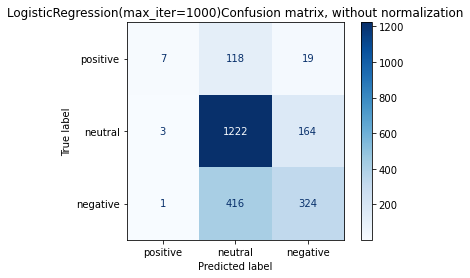

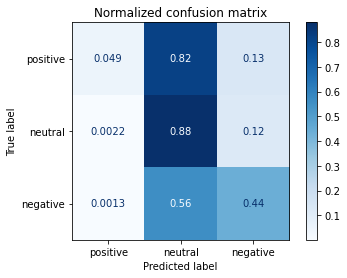

              precision    recall  f1-score   support

    negative       0.80      0.03      0.05       144
     neutral       0.66      0.93      0.77      1389
    positive       0.67      0.26      0.38       741

    accuracy                           0.66      2274
   macro avg       0.71      0.41      0.40      2274
weighted avg       0.67      0.66      0.60      2274



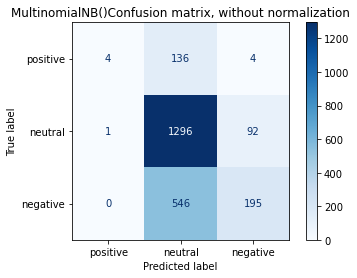

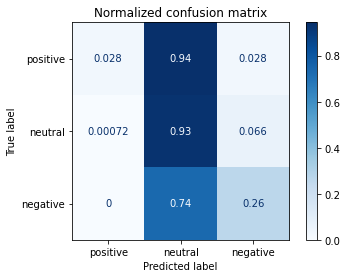

              precision    recall  f1-score   support

    negative       0.64      0.20      0.31       144
     neutral       0.70      0.87      0.78      1389
    positive       0.66      0.45      0.54       741

    accuracy                           0.69      2274
   macro avg       0.67      0.51      0.54      2274
weighted avg       0.69      0.69      0.67      2274



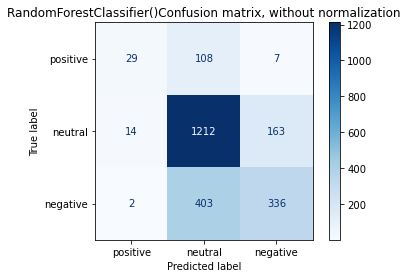

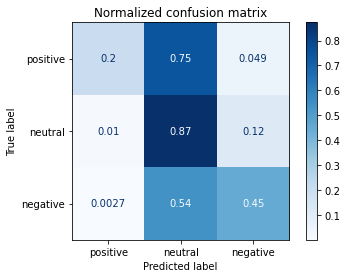

In [71]:
confusion_plot(lr_classifier)
confusion_plot(nb_classifier)
confusion_plot(rf_classifier)

**Since for all the models the recall is lower than the precision. In this case, the model has problems detecting the class well but when it does the results are somewhat trustworthy. Class imbalance might have some cause for this. For now Random Forest has the best model so far. Next going to try to tune some of the parameters to get a better accuracy and recall.**

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
forest_clf = RandomForestClassifier(n_estimators=100)
forest_model = forest_clf.fit(tf_idf_train, y_train)

In [74]:
# forest_params = {'min_samples_split' : [5, 10, 15, 20],
#                  'min_samples_leaf' : [5, 10, 15, 20],
#                 'n_estimators': [100, 200, 300, 400, 500]}
# grid_search = GridSearchCV(forest_model, param_grid=forest_params, scoring='accuracy')
# grid_search.fit(tf_idf_train, y_train)

In [ ]:
grid_search.best_params_

In [76]:
rf_classifier_2 = RandomForestClassifier(n_estimators=300, min_samples_leaf= 5,
                                         min_samples_split = 20)

rf_classifier_2.fit(tf_idf_train, y_train)
rf_train_preds = rf_classifier_2.predict(tf_idf_train)
rf_test_preds = rf_classifier_2.predict(tf_idf_test)

rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print(rf_train_score, rf_test_score)

0.7175538935327761 0.6649076517150396


              precision    recall  f1-score   support

    negative       0.50      0.02      0.04       144
     neutral       0.66      0.95      0.78      1389
    positive       0.71      0.25      0.37       741

    accuracy                           0.66      2274
   macro avg       0.62      0.41      0.40      2274
weighted avg       0.67      0.66      0.60      2274



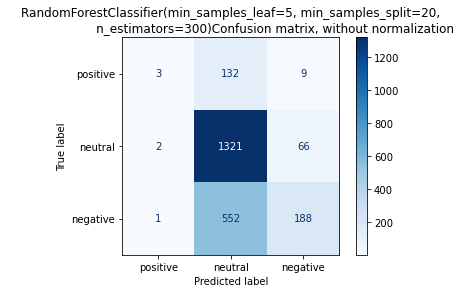

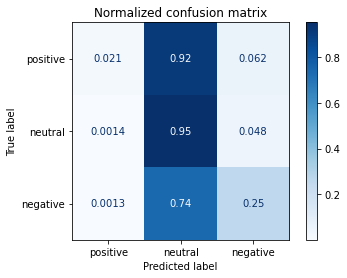

In [77]:
confusion_plot(rf_classifier_2)

**So getting rid of some 'noise' dropped the accuracy of the training data down to 72%, along with the precision and recall scores. I'm sure a little more tuning can help with the score later on.**

# Recommendation

* **Looking at the accuracy score and confusion matrix of all the models, at this time the best model will be the Logistic Regression model.** 
* **Although not great the LR model has the highest accuracy, recall, and prescision overall.**

# Future Recommendations

* **1. Look into the Neutral comments and get rid of comments not related to the subject.**
* **2. Scrape for more data to possibly balance the three classes, especially negative and positive comments.**
* **3. Build a binary class focus on only the positive and negative comments then add the neutral comments later om.** 